# Load Images in NIfTI Format

In [3]:
import SimpleITK as sitk

mri_path = "../Data/BraTS2021_00000_flair.nii.gz"
mri_seg_path = "../Data/BraTS2021_00000_seg.nii.gz"
ct_path = "../Data/volume-0.nii"
ct_seg_path = "../Data/segmentation-0.nii"

img_array = sitk.GetArrayFromImage(sitk.ReadImage(mri_path, sitk.sitkFloat32))
seg_array = sitk.GetArrayFromImage(sitk.ReadImage(mri_seg_path, sitk.sitkFloat32))

slice = img_array.shape[0]//2
img_slice = img_array[slice]
seg_slice = seg_array[slice]

# Visualization Volumetric Images in Python

In [45]:
import matplotlib.pyplot as plt
def plotImage(image, slices):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5),)
    fig.suptitle('Original Image, slices: ' + str(slices), fontsize=20)
    ax1.imshow(image[slices[0], :, :], cmap='gray'); ax1.axis('off'); ax1.set_title('Axial', fontsize=16)
    ax2.imshow(image[::-1,slices[1],::-1], cmap='gray'); ax2.axis('off'); ax2.set_title('Coronal', fontsize=16)
    ax3.imshow(image[::-1,:,slices[2]], cmap='gray'); ax3.axis('off'); ax3.set_title('Sagittal', fontsize=16)
    plt.show()

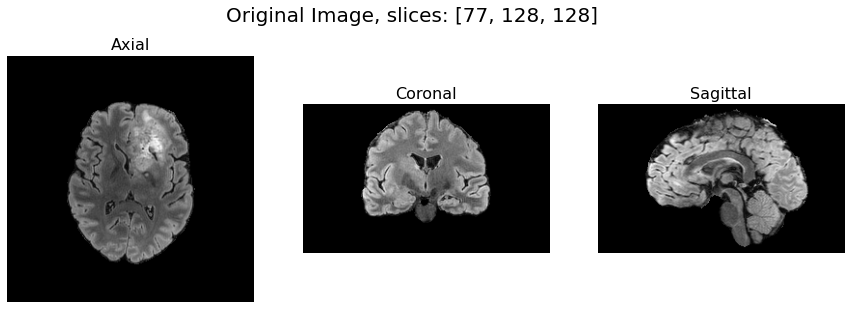

In [46]:
slices = [img_array.shape[0]//2, img_array.shape[1]//2, img_array.shape[2]//2]
plotImage(img_array, slices)

# Interpolation

## Nearest Neighbor, Bilinear Interpolation, Cubic Interpolation

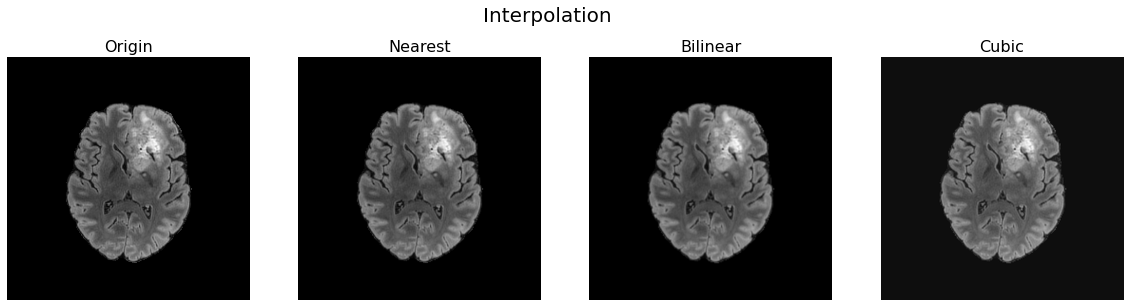

In [19]:
from tkinter import font
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
    
# order=0:nearest interpolation;order=1:bilinear interpolation;order=3:cubic interpolation
out_nearest = ndimage.zoom(img_slice, 2.0, order=0)
out_bilinear = ndimage.zoom(img_slice, 2.0, order=1)
out_cubic = ndimage.zoom(img_slice, 2.0, order=3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(out_nearest, cmap='gray'); ax2.set_title("Nearest", fontsize=16); ax2.axis('off')
ax3.imshow(out_bilinear, cmap='gray'); ax3.set_title("Bilinear", fontsize=16); ax3.axis('off')
ax4.imshow(out_cubic, cmap='gray'); ax4.set_title("Cubic", fontsize=16); ax4.axis('off')
fig.suptitle('Interpolation', fontsize=20)
plt.show()

# Separable Convolution Filters
Mean filter	(a.k.a.	uniform	filter) in 2d image medical images,	which	replaces the value of a	pixel	by the mean value of an area centered at the pixel;

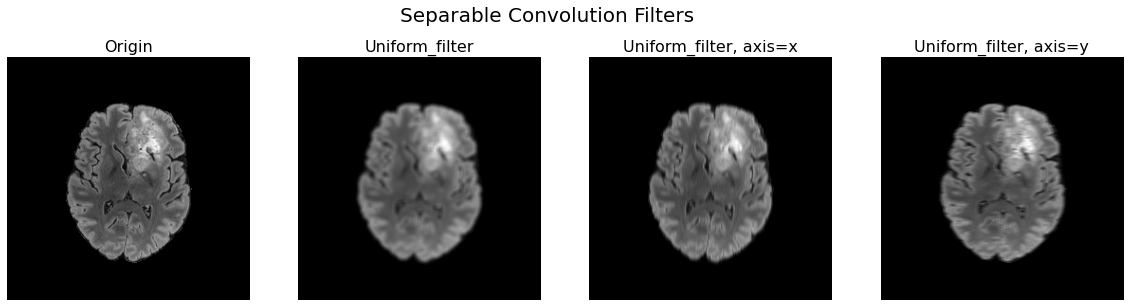

In [22]:
from scipy import ndimage
import matplotlib.pyplot as plt

result = ndimage.uniform_filter(img_slice, size=5)
result_x = ndimage.uniform_filter1d(img_slice, size=5, axis=0)
result_y = ndimage.uniform_filter1d(img_slice, size=5, axis=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result, cmap='gray'); ax2.set_title("Uniform_filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_x, cmap='gray'); ax3.set_title("Uniform_filter, axis=x", fontsize=16); ax3.axis('off')
ax4.imshow(result_y, cmap='gray'); ax4.set_title("Uniform_filter, axis=y", fontsize=16); ax4.axis('off')
fig.suptitle('Separable Convolution Filters', fontsize=20)
plt.show()

# Non Linear Separable Filter
maximum and minimum filters

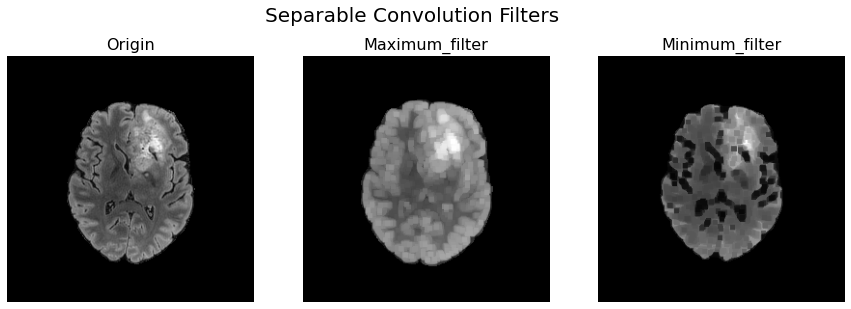

In [23]:
from scipy import ndimage
import matplotlib.pyplot as plt

result_maximum_filter = ndimage.maximum_filter(img_slice, size=5)
result_minimum_filter = ndimage.minimum_filter(img_slice, size=5)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_maximum_filter, cmap='gray'); ax2.set_title("Maximum_filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_minimum_filter, cmap='gray'); ax3.set_title("Minimum_filter", fontsize=16); ax3.axis('off')
fig.suptitle('Non Linear Separable Filters', fontsize=20)
plt.show()

# Non Linear Non Separable Filters
Median Filter

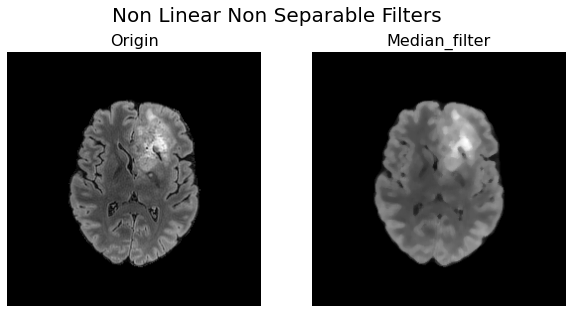

In [24]:
from scipy import ndimage
import matplotlib.pyplot as plt

result_median_filter = ndimage.median_filter(img_slice, size=5)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_median_filter, cmap='gray'); ax2.set_title("Median_filter", fontsize=16); ax2.axis('off')
fig.suptitle('Non Linear Non Separable Filters', fontsize=20)
plt.show()

# Recursive Filters
Showing how the filters work in 1D instances.

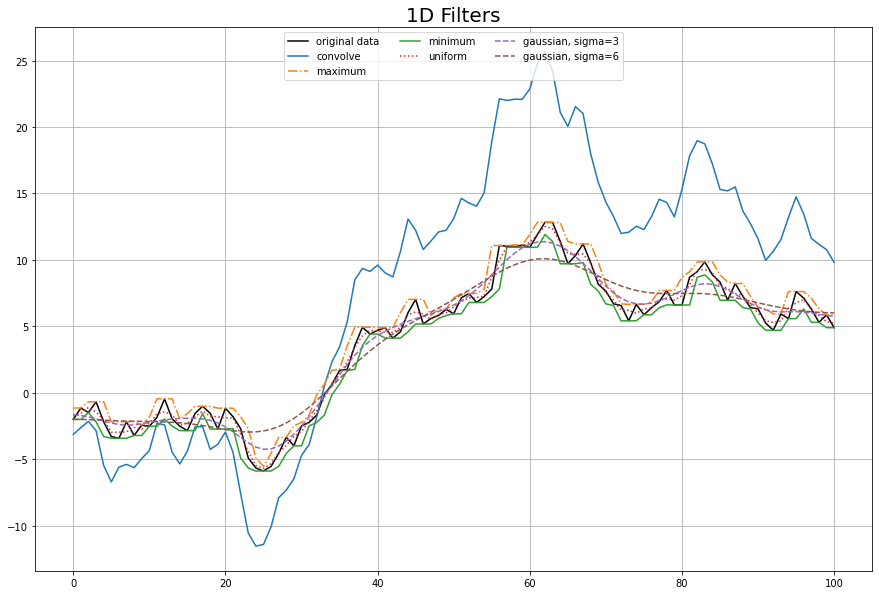

In [28]:
import numpy as np
from scipy.ndimage import convolve1d, gaussian_filter1d, maximum_filter1d, minimum_filter1d, uniform_filter1d
import matplotlib.pyplot as plt

rng = np.random.default_rng()
x = rng.standard_normal(101).cumsum()

result_convolve1d = convolve1d(x, weights=[1, 1])

result_gaussian_filter1d_sigma3 = gaussian_filter1d(x, sigma=3)
result_gaussian_filter1d_sigma6 = gaussian_filter1d(x, sigma=6)

result_maximum_filter1d = maximum_filter1d(x, size=3)

result_minimum_filter1d = minimum_filter1d(x, size=3)

result_uniform_filter1d = uniform_filter1d(x, size=3)

fig = plt.figure(figsize=(15,10))

plt.plot(x, 'k', label='original data')
plt.plot(result_convolve1d, '-', label='convolve')
plt.plot(result_maximum_filter1d, '-.', label='maximum')
plt.plot(result_minimum_filter1d, '-', label='minimum')
plt.plot(result_uniform_filter1d, ':', label='uniform')
plt.plot(result_gaussian_filter1d_sigma3, '--', label='gaussian, sigma=3')
plt.plot(result_gaussian_filter1d_sigma6, '--', label='gaussian, sigma=6')

plt.legend(loc='upper center', ncol = 3)
plt.grid()
plt.title('1D Filters', fontsize=20)
# plt.savefig('./outputs/1d_filter.png')
plt.show()

# Smoothing Filters
Gaussian Filter, Binomial Filters, Gaussian Recursive Filtering, 
Anisotropic Diffusion

In [29]:
import numpy as np
from scipy import ndimage
import warnings
def anisodiff(img,niter=1,kappa=50,gamma=0.1,step=(1.,1.),sigma=0, option=1,ploton=False):
	"""
	Anisotropic diffusion.

	Usage:
	imgout = anisodiff(im, niter, kappa, gamma, option)

	Arguments:
	        img    - input image
	        niter  - number of iterations
	        kappa  - conduction coefficient 20-100 ?
	        gamma  - max value of .25 for stability
	        step   - tuple, the distance between adjacent pixels in (y,x)
	        option - 1 Perona Malik diffusion equation No 1
	                 2 Perona Malik diffusion equation No 2
	        ploton - if True, the image will be plotted on every iteration

	Returns:
	        imgout   - diffused image.

	kappa controls conduction as a function of gradient.  If kappa is low
	small intensity gradients are able to block conduction and hence diffusion
	across step edges.  A large value reduces the influence of intensity
	gradients on conduction.

	gamma controls speed of diffusion (you usually want it at a maximum of
	0.25)

	step is used to scale the gradients in case the spacing between adjacent
	pixels differs in the x and y axes

	Diffusion equation 1 favours high contrast edges over low contrast ones.
	Diffusion equation 2 favours wide regions over smaller ones.

	Reference: 
	P. Perona and J. Malik. 
	Scale-space and edge detection using ansotropic diffusion.
	IEEE Transactions on Pattern Analysis and Machine Intelligence, 
	12(7):629-639, July 1990.

	Original MATLAB code by Peter Kovesi  
	School of Computer Science & Software Engineering
	The University of Western Australia
	pk @ csse uwa edu au
	<http://www.csse.uwa.edu.au>

	Translated to Python and optimised by Alistair Muldal
	Department of Pharmacology
	University of Oxford
	<alistair.muldal@pharm.ox.ac.uk>

	June 2000  original version.       
	March 2002 corrected diffusion eqn No 2.
	July 2012 translated to Python
	"""

	# ...you could always diffuse each color channel independently if you
	# really want
	if img.ndim == 3:
		warnings.warn("Only grayscale images allowed, converting to 2D matrix")
		img = img.mean(2)

	# initialize output array
	img = img.astype('float32')
	imgout = img.copy()

	# initialize some internal variables
	deltaS = np.zeros_like(imgout)
	deltaE = deltaS.copy()
	NS = deltaS.copy()
	EW = deltaS.copy()
	gS = np.ones_like(imgout)
	gE = gS.copy()

	# create the plot figure, if requested
	if ploton:
		import pylab as pl
		from time import sleep

		fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
		ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

		ax1.imshow(img,interpolation='nearest')
		ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
		ax1.set_title("Original image")
		ax2.set_title("Iteration 0")

		fig.canvas.draw()

	for ii in np.arange(1,niter):

		# calculate the diffs
		deltaS[:-1,: ] = np.diff(imgout,axis=0)
		deltaE[: ,:-1] = np.diff(imgout,axis=1)

		if 0<sigma:
			deltaSf=ndimage.gaussian_filter(deltaS,sigma)
			deltaEf=ndimage.gaussian_filter(deltaE,sigma)
		else: 
			deltaSf=deltaS
			deltaEf=deltaE
			
		# conduction gradients (only need to compute one per dim!)
		if option == 1:
			gS = np.exp(-(deltaSf/kappa)**2.)/step[0]
			gE = np.exp(-(deltaEf/kappa)**2.)/step[1]
		elif option == 2:
			gS = 1./(1.+(deltaSf/kappa)**2.)/step[0]
			gE = 1./(1.+(deltaEf/kappa)**2.)/step[1]

		# update matrices
		E = gE*deltaE
		S = gS*deltaS

		# subtract a copy that has been shifted 'North/West' by one
		# pixel. don't as questions. just do it. trust me.
		NS[:] = S
		EW[:] = E
		NS[1:,:] -= S[:-1,:]
		EW[:,1:] -= E[:,:-1]

		# update the image
		imgout += gamma*(NS+EW)

		if ploton:
			iterstring = "Iteration %i" %(ii+1)
			ih.set_data(imgout)
			ax2.set_title(iterstring)
			fig.canvas.draw()
			# sleep(0.01)

	return imgout

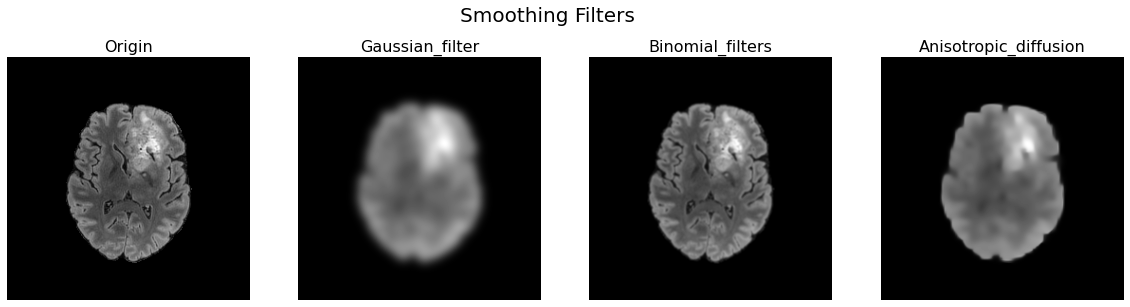

In [30]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

result_gaussian_filter = ndimage.gaussian_filter(img_slice, sigma=5)

k = np.array([[1,2,1],[2,4,2],[1,2,1]])
k = k/k.sum()
result_binomial_filters = ndimage.convolve(img_slice, k, mode='constant', cval=0.0)

result_anisotropic_diffusion = anisodiff(img_slice, 100, 80, 0.075, (1,1), 2.5, 1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_gaussian_filter, cmap='gray'); ax2.set_title("Gaussian_filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_binomial_filters, cmap='gray'); ax3.set_title("Binomial_filters", fontsize=16); ax3.axis('off')
ax4.imshow(result_anisotropic_diffusion, cmap='gray'); ax4.set_title("Anisotropic_diffusion", fontsize=16); ax4.axis('off')
fig.suptitle('Smoothing Filters', fontsize=20)
plt.show()

# Gradient Filters
Sobel filters, laplacian recursive gaussian filter

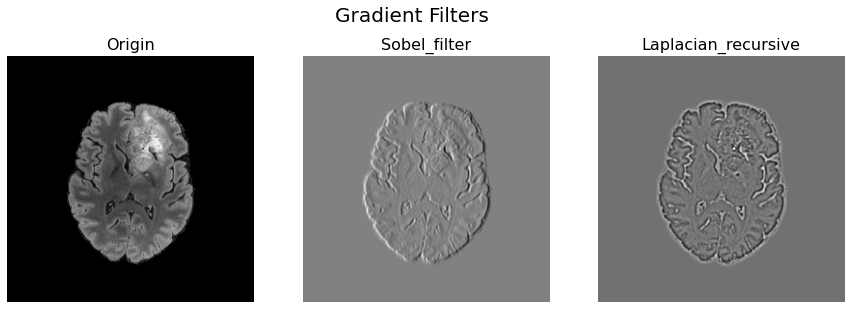

In [31]:
import itk
from scipy import ndimage
import matplotlib.pyplot as plt

result_sobel_filter = ndimage.sobel(img_slice)
result_recursive_gaussian_filter = itk.laplacian_recursive_gaussian_image_filter(img_slice)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result_sobel_filter, cmap='gray'); ax2.set_title("Sobel_filter", fontsize=16); ax2.axis('off')
ax3.imshow(result_recursive_gaussian_filter, cmap='gray'); ax3.set_title("Laplacian_recursive", fontsize=16); ax3.axis('off')
fig.suptitle('Gradient Filters', fontsize=20)
plt.show()

# Image Contour Extraction
Canny Filters

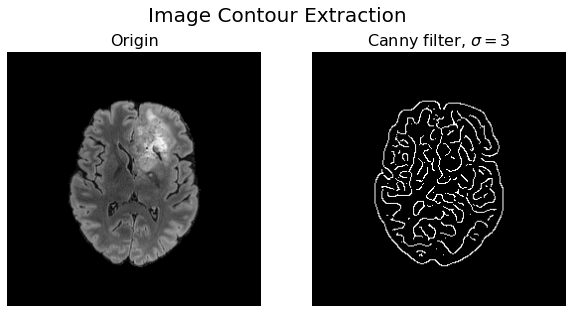

In [32]:
from skimage import feature
import matplotlib.pyplot as plt

edges = feature.canny(img_slice, sigma=3)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(edges, cmap='gray'); ax2.set_title(r'Canny filter, $\sigma=3$', fontsize=16); ax2.axis('off')
fig.suptitle('Image Contour Extraction', fontsize=20)
plt.show()

# Mathematical Morphology
erosion, dilation, closure, opening, morphological gradient on binary image and gray image.


#### Binary image: erosion, dilation, closure, opening, morphological gradient

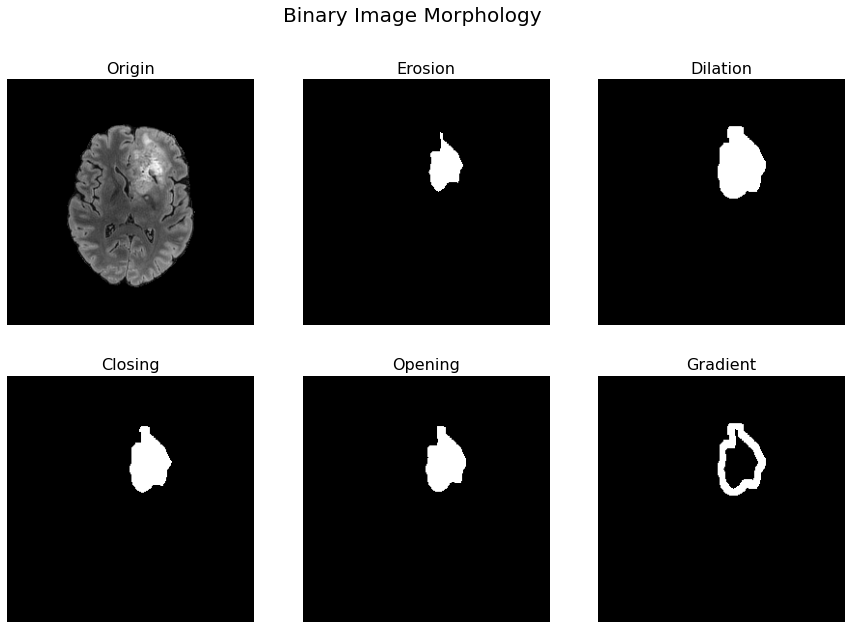

In [35]:
from skimage.morphology import square
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening
from skimage.morphology import erosion, dilation, closing, opening
from scipy.ndimage import morphological_gradient
import matplotlib.pyplot as plt

seg_slice[seg_slice>=1] = 1
resutls_binary_erosion = binary_erosion(seg_slice, square(7))
resutls_binary_dilation = binary_dilation(seg_slice, square(7))
resutls_binary_closing = binary_closing(seg_slice, square(7))
resutls_binary_opening = binary_opening(seg_slice, square(7))
resutls_binary_gradient = morphological_gradient(seg_slice, size=(7,7))

fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(resutls_binary_erosion, cmap='gray'); ax2.set_title("Erosion", fontsize=16); ax2.axis('off')
ax3.imshow(resutls_binary_dilation, cmap='gray'); ax3.set_title("Dilation", fontsize=16); ax3.axis('off')

ax4.imshow(resutls_binary_closing, cmap='gray'); ax4.set_title("Closing", fontsize=16); ax4.axis('off')
ax5.imshow(resutls_binary_opening, cmap='gray'); ax5.set_title("Opening", fontsize=16); ax5.axis('off')
ax6.imshow(resutls_binary_gradient, cmap='gray'); ax6.set_title("Gradient", fontsize=16); ax6.axis('off')

fig.suptitle('Binary Image Morphology', fontsize=20)
plt.show()

#### Gray image: erosion, dilation, closure, opening, morphological gradient

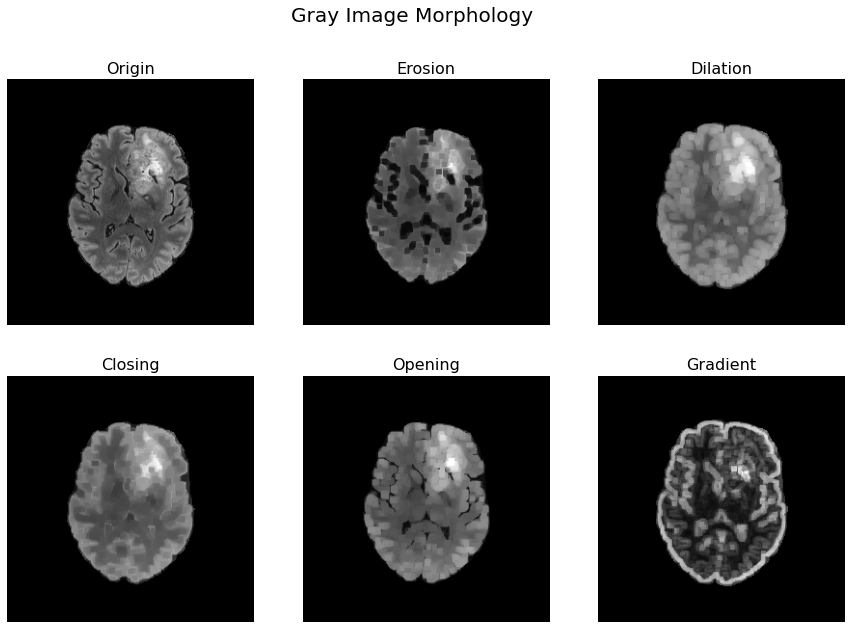

In [36]:
resutls_erosion = erosion(img_slice, square(5))
resutls_dilation = dilation(img_slice, square(5))
resutls_closing = closing(img_slice, square(5))
resutls_opening = opening(img_slice, square(5))
resutls_gradient = morphological_gradient(img_slice, size=(5,5))

fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(resutls_erosion, cmap='gray'); ax2.set_title("Erosion", fontsize=16); ax2.axis('off')
ax3.imshow(resutls_dilation, cmap='gray'); ax3.set_title("Dilation", fontsize=16); ax3.axis('off')

ax4.imshow(resutls_closing, cmap='gray'); ax4.set_title("Closing", fontsize=16); ax4.axis('off')
ax5.imshow(resutls_opening, cmap='gray'); ax5.set_title("Opening", fontsize=16); ax5.axis('off')
ax6.imshow(resutls_gradient, cmap='gray'); ax6.set_title("Gradient", fontsize=16); ax6.axis('off')

fig.suptitle('Gray Image Morphology', fontsize=20)
plt.show()

# Distance Maps

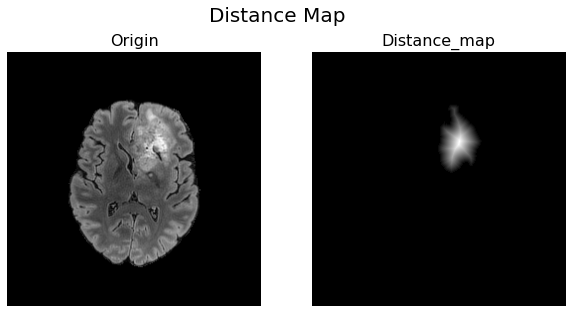

In [41]:
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt

seg_slice[seg_slice>=1] = 1
result = distance_transform_edt(seg_slice)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result, cmap='gray'); ax2.set_title("Distance_map", fontsize=16); ax2.axis('off')
fig.suptitle('Distance Map', fontsize=20)
plt.show()

# Fast Marching

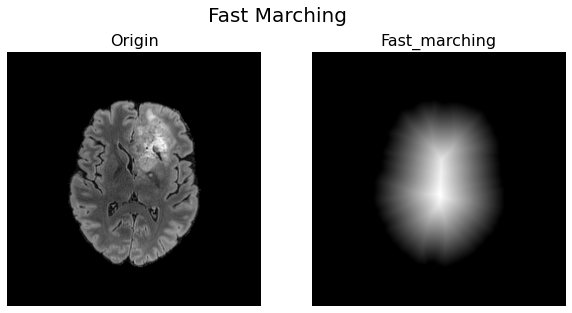

In [40]:
import matplotlib.pyplot as plt
import skfmm

result = skfmm.distance(img_slice, dx=1e-2)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(img_slice, cmap='gray'); ax1.set_title("Origin", fontsize=16); ax1.axis('off')
ax2.imshow(result, cmap='gray'); ax2.set_title("Fast_marching", fontsize=16); ax2.axis('off')
fig.suptitle('Fast Marching', fontsize=20)
plt.show()